# **Diamond-Price-Prediction**
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AD006/Diamond_Price_Prediction/main/diamonds.csv',)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Exploratory Data Analysis(EDA)**

In [4]:
#look like first column is useless so lets drop it
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### **X Y Z**
In x, y, z we can see that the value is 0. Which means there are diamonds which have no dimensions. So we have to eliminate these values.

In [8]:
#Droping dimensionless values
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


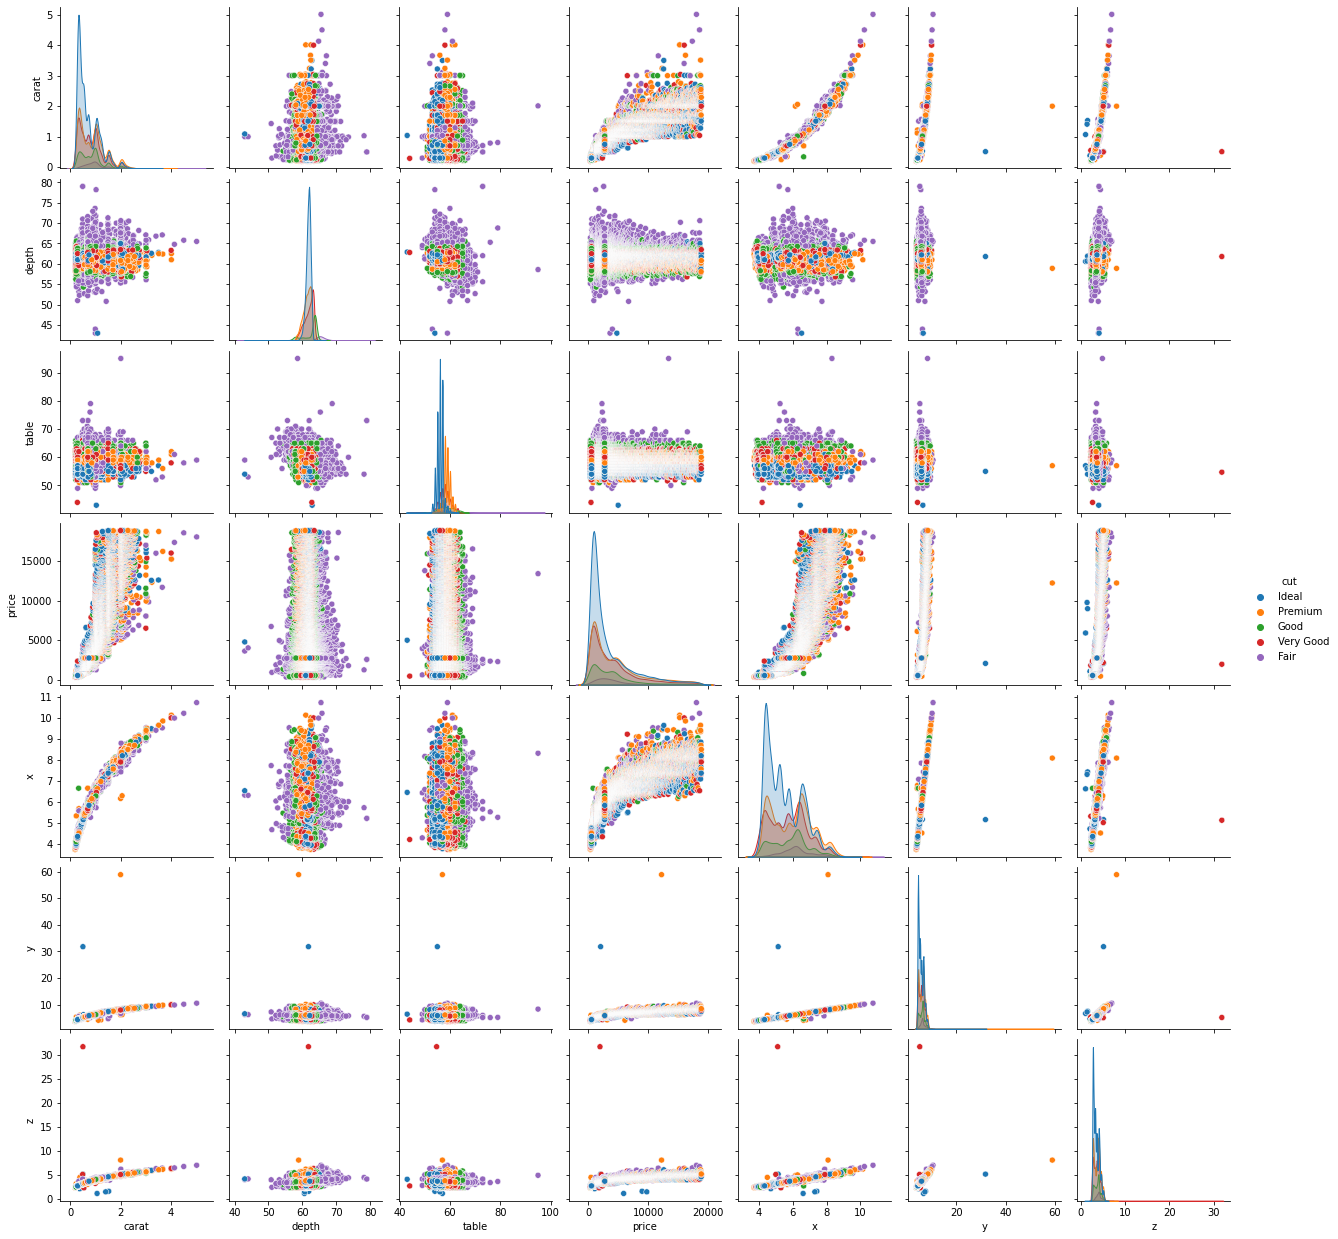

In [10]:
sns.pairplot(df, hue='cut')

### **Eliminating the Outliers**
As you can see there are outliers in the pairplot. Let's have a closer look at them

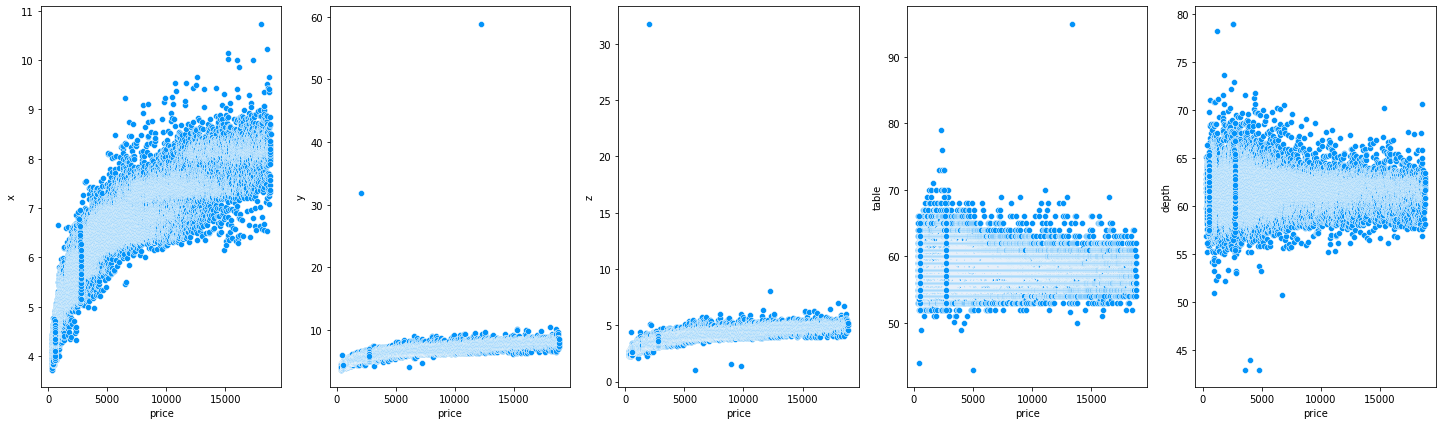

In [11]:
sns.set_palette('terrain')
cols=['x','y','z','table','depth']
c=0
fig, axs=plt.subplots(ncols=len(cols),figsize=(25,7))
for i in cols:
  sns.scatterplot(data=df, x=df['price'], y=df[i], ax = axs[c])
  c+=1

**Range:**

*   x only values that are <20
*   y only values that are <20

*   z only values that are <20 and >2
*   table only values that are <80 and >40

*   depth only values that are <75 and >45

In [12]:
df.shape

(53920, 10)

In [13]:
df=df[(df['x'] < 20)]
df=df[(df['y'] < 20)]
df=df[(df['z'] < 20) & (df['z'] > 2)]
df=df[(df['table'] < 80) & (df['table'] > 40)]
df=df[(df['depth'] < 75) & (df['depth'] > 45)]


In [14]:
df.shape

(53907, 10)

Now let's have a look again at the cleaned columns:

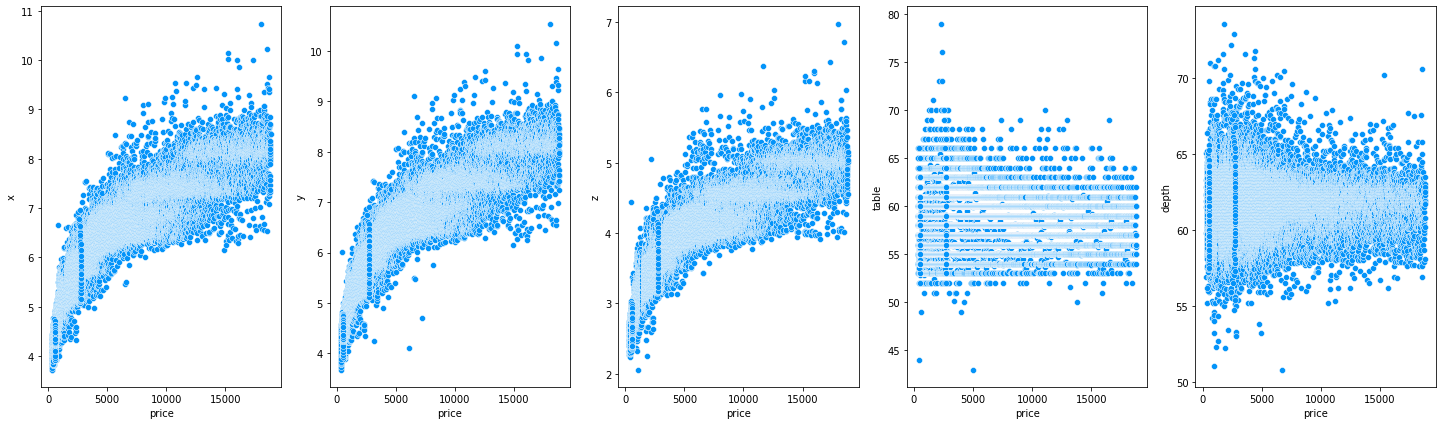

In [15]:
sns.set_palette('terrain')
cols=['x','y','z','table','depth']
c=0
fig, axs=plt.subplots(ncols=len(cols),figsize=(25,7))
for i in cols:
  sns.scatterplot(data=df, x=df['price'], y=df[i], ax = axs[c])
  c+=1

**Categorical Features:**

In [16]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


**Converting Categorical Values into Numerical Value:**

In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [18]:
categ=['cut','color','clarity']

df[categ]=df[categ].apply(le.fit_transform)

In [19]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


**Checking correlations between the features:**

In [20]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017354,0.291307,-0.214143,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037
cut,0.017354,1.000000,0.000177,0.028091,-0.195841,0.152591,0.039980,0.022166,0.028033,0.000809
color,0.291307,0.000177,1.000000,-0.027710,0.049040,0.026982,0.172358,0.270603,0.270408,0.275183
clarity,-0.214143,0.028091,-0.027710,1.000000,-0.053510,-0.088240,-0.071512,-0.225906,-0.222956,-0.229976
depth,0.029267,-0.195841,0.049040,-0.053510,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525
table,0.181797,0.152591,0.026982,-0.088240,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670
price,0.921590,0.039980,0.172358,-0.071512,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634
x,0.977777,0.022166,0.270603,-0.225906,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665
y,0.976860,0.028033,0.270408,-0.222956,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327
z,0.977037,0.000809,0.275183,-0.229976,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000


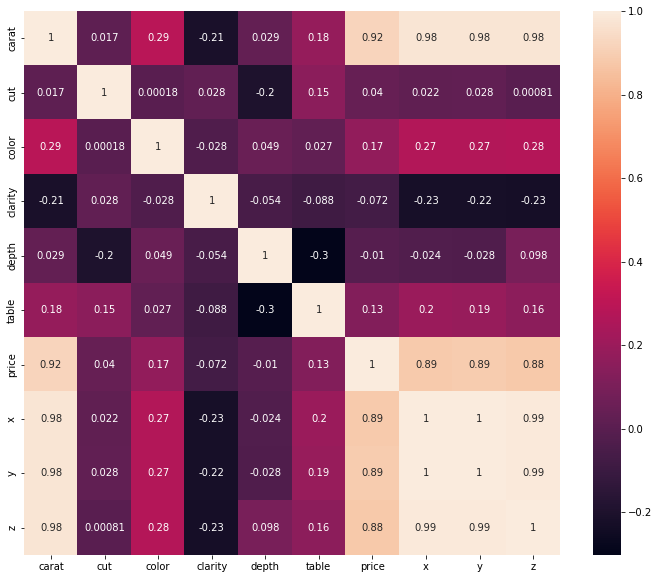

In [21]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)

We can observe that high correlations from x,y,z and carat to the price

# **Builiding pipelines and Model Evalution:**

In [22]:
#Importing required libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost import XGBRegressor

In [23]:
X=df.drop(columns='price', axis=1)
Y=df['price']

In [24]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [25]:
Y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [26]:
#Lets split the data into train and test
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape, X_test.shape)

(43125, 9) (10782, 9)


Building Piplelines

In [28]:
#Linear Regression
lr=Pipeline([('scaler_1', StandardScaler()), 
             ('lr_classifer', LinearRegression())])

#Knn
knn=Pipeline([('scaler_2', StandardScaler()), 
             ('knn_classifer', KNeighborsRegressor())])

#Xgb
xgb=Pipeline([('scaler_3', StandardScaler()), 
             ('xgb_classifer', XGBRegressor(objective ='reg:squarederror'))])

#Decision Tree
dt=Pipeline([('scaler_4', StandardScaler()), 
             ('dt_classifer', DecisionTreeRegressor())])

#Random Forest
rf=Pipeline([('scaler_5', StandardScaler()), 
             ('rf_classifer', RandomForestRegressor())])

Pipelines=[lr,knn,xgb,dt,rf]
models=['Linear Regression', 'KNN', 'XGB', 'Decicion Tree', 'Random Forest']

Fitting Model to the Training Data:

In [29]:
for i in Pipelines:
  i.fit(X_train, Y_train)

## Cross Validation
The purpose of cross–validation is to test the ability of a machine learning model to predict new data

Using the negative Root Mean Squared Error: The higher the score the better the accuracy.

In [30]:
cv=[]
for i, model in enumerate(Pipelines):
  cv_score=cross_val_score(model, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=10)
  cv.append(cv_score)
  print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -1344.867308 
KNN: -812.733542 
XGB: -669.568744 
Decicion Tree: -747.985801 
Random Forest: -548.746823 


**This suggests that the RandomForest Regression model is the best model as compared to all the other models.**

In [31]:
pred=rf.predict(X_test)
print(pred)

[16230.52    534.442   718.28  ...  1118.06   4757.27   4713.78 ]


In [32]:
print("MSE:", metrics.mean_squared_error(Y_test, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("MAE:", metrics.mean_absolute_error(Y_test, pred))
print("R²:", metrics.r2_score(Y_test, pred))
print("Adjusted R²:", 1-(1-metrics.r2_score(Y_test, pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

MSE: 309446.83294490783
RMSE: 556.2794557997876
MAE: 265.905718501294
R²: 0.9796251700880402
Adjusted R²: 0.9796081469289976


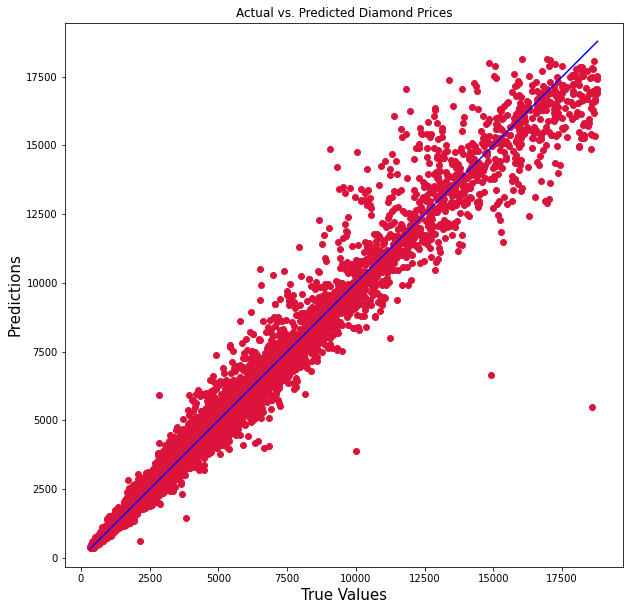

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred, c='crimson')
plt.title("Actual vs. Predicted Diamond Prices")

p1 = max(max(Y_test), max(pred))
p2 = min(min(Y_test), min(pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## **Pretty good model**